# CELL VIABILITY OF AXL MUTANTS

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
from msresist.FileExporter import create_download_link
from msresist.pre_processing import MergeTR
from msresist.figures.figure1 import FC_timecourse, barplot_UtErlAF154, barplotFC_TvsUT

In [2]:
# pd.set_option('display.max_colwidth', 1000)
# pd.set_option('display.max_rows', 1000)
# pd.set_option('display.max_columns', 1000)

In [3]:
r1 = pd.read_csv("msresist/data/Phenotypic_data/AXLmutants/Phase/BR1_Phase.csv").dropna()
r2 = pd.read_csv('msresist/data/Phenotypic_data/AXLmutants/Phase/BR2_Phase.csv')
r3 = pd.read_csv('msresist/data/Phenotypic_data/AXLmutants/Phase/BR3_Phase.csv').iloc[:, :31]
lines = ["PC9", "KO", "KD", "KI", "Y634F", "Y643F", "Y698F", "Y726F", "Y750F ", "Y821F"]

In [4]:
itp = 24
ftp = 120

## Cell Viability

### Time Course

In [5]:
t1 = ["-UT", "-A/E", "-E"]
t2 = ["Untreated", "Erl + AF154", "Erlotinib"]
ylabel = "fold-change to t=" + str(itp) + "h"

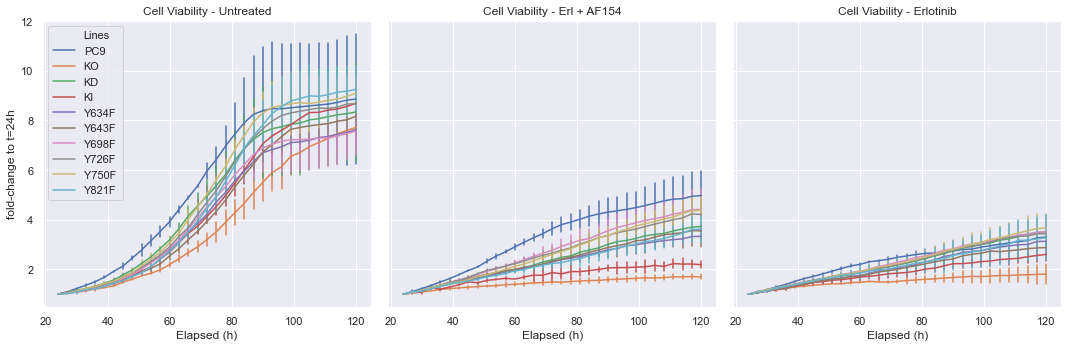

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=True, sharex=True)

for i in range(len(t1)):
    title = "Cell Viability - " + t2[i]
    FC_timecourse(ax[i], r2, r3, itp, ftp, lines, t1[i], title, ylabel, FC=True)

plt.tight_layout()

### At specified endpoint

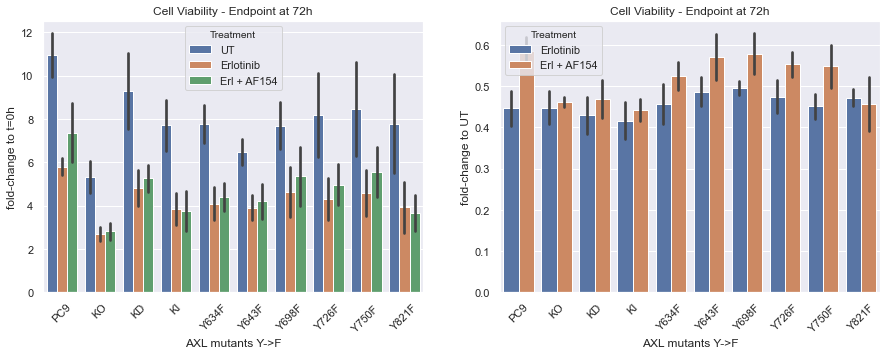

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

ftp = 72
itp = 0
barplot_UtErlAF154(ax[0], lines, r1, r2, itp, ftp, r3, FC=True)
barplotFC_TvsUT(ax[1], r1, r2, itp, ftp, lines, r3, FC=False)

## Cell Death

### Count of apoptotic cells

### Time Course

In [24]:
red2 = pd.read_csv("msresist/data/Phenotypic_data/AXLmutants/Red/BR2_RedCounts.csv")
red3 = pd.read_csv("msresist/data/Phenotypic_data/AXLmutants/Red/BR3_RedCounts.csv")

In [30]:
ftp = 120
ylabel = "YOYO+ cell count (" + str(ftp) + "h)"

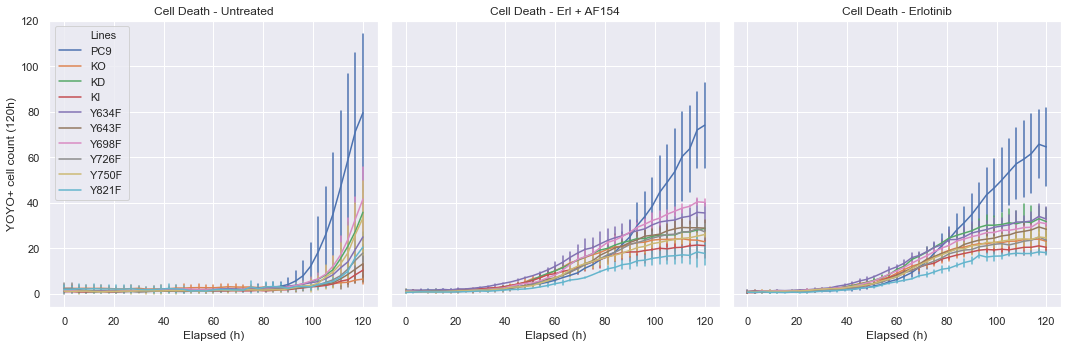

In [31]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=True, sharex=True)

for i in range(len(t1)):
    title = "Cell Death - " + t2[i]
    FC_timecourse(ax[i], red2, red3, itp, ftp, lines, t1[i], title, ylabel, FC=False)

plt.tight_layout()

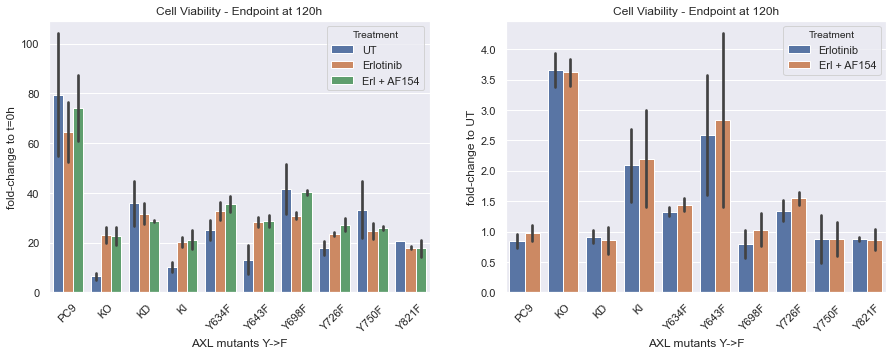

In [29]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

ftp = 120
itp = 0
barplot_UtErlAF154(ax[0], lines, red2, red3, itp, ftp, FC=False)
barplotFC_TvsUT(ax[1], red2, red3, itp, ftp, lines, FC=False)

## Cell Migration